<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Assignment: Exploring and Preparing Data


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab


In [1]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [2]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

<ipython-input-2-cde6ab162d36>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Exploratory Data Analysis


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [3]:
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp = await fetch(URL)
dataset_part_2_csv = io.BytesIO((await resp.arrayBuffer()).to_py())
df=pd.read_csv(dataset_part_2_csv)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass also appears to be a factor; even with more massive payloads, the first stage often returns successfully.


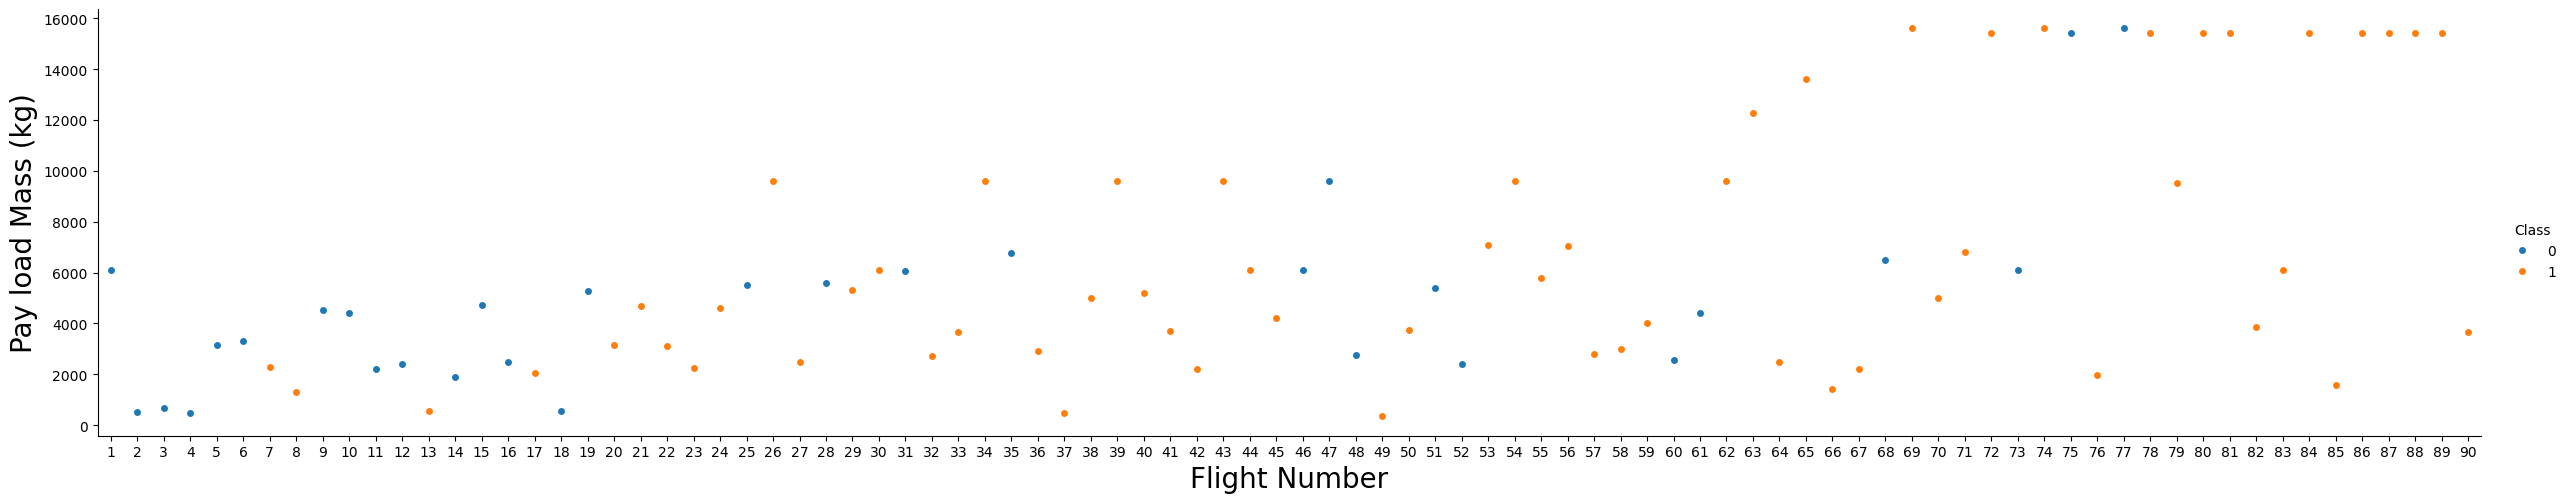

In [4]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

Next, let's drill down to each site visualize its detailed launch records.


### TASK 1: Visualize the relationship between Flight Number and Launch Site


Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'Class'],
      dtype='object')


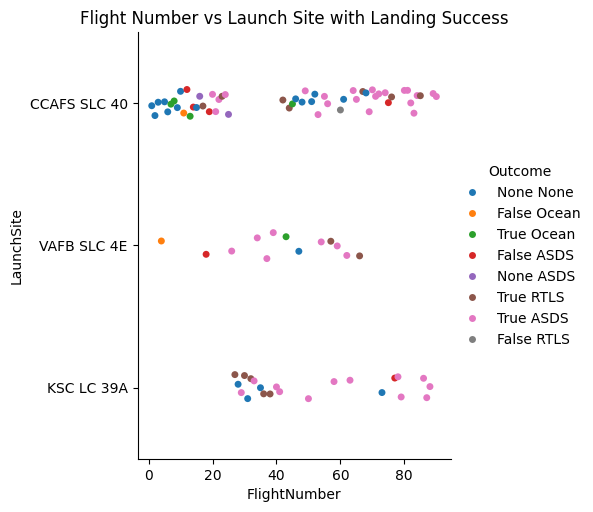

In [7]:


import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the column is named 'Outcome'
sns.catplot(x='FlightNumber', y='LaunchSite', hue='Outcome', data=df, kind='strip')

plt.title('Flight Number vs Launch Site with Landing Success')
plt.show()


Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


### TASK 2: Visualize the relationship between Payload Mass and Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


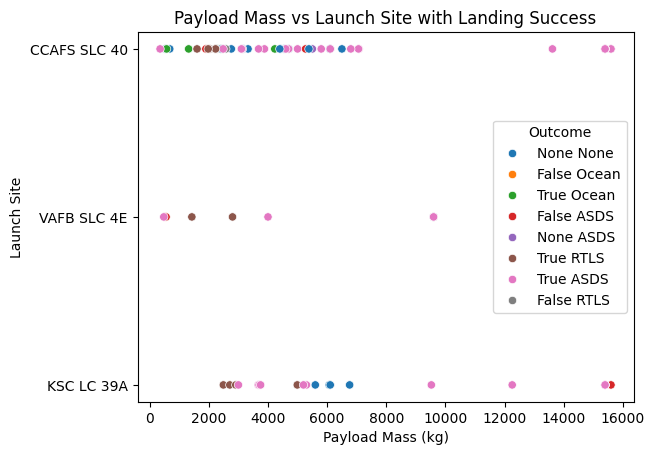

In [8]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with columns: PayloadMass, LaunchSite, and the correct landing outcome column (e.g., 'Outcome')
sns.scatterplot(x='PayloadMass', y='LaunchSite', hue='Outcome', data=df)

# Adding title for clarity
plt.title('Payload Mass vs Launch Site with Landing Success')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Launch Site')
plt.show()


Now if you observe Payload Mass Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


### TASK  3: Visualize the relationship between success rate of each orbit type


Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


<ipython-input-20-cfa80c1ec069>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Outcome'].fillna(0, inplace=True)


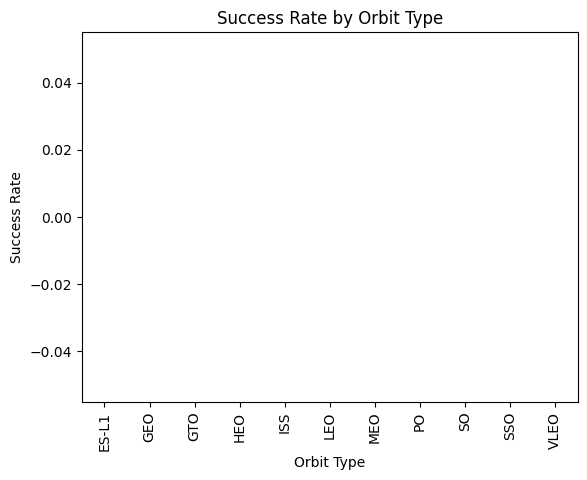

In [20]:
# Fill NaN values in 'Outcome' column with a default value, for example, 0 (assume failure)
df['Outcome'].fillna(0, inplace=True)

# Now proceed with the groupby and plotting:
success_rate_orbit = df.groupby('Orbit')['Outcome'].mean()

# Plot the bar chart again
success_rate_orbit.plot(kind='bar', color='skyblue')

plt.title('Success Rate by Orbit Type')
plt.ylabel('Success Rate')
plt.xlabel('Orbit Type')
plt.show()







Analyze the plotted bar chart to identify which orbits have the highest success rates.


### TASK  4: Visualize the relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


<Figure size 1200x600 with 0 Axes>

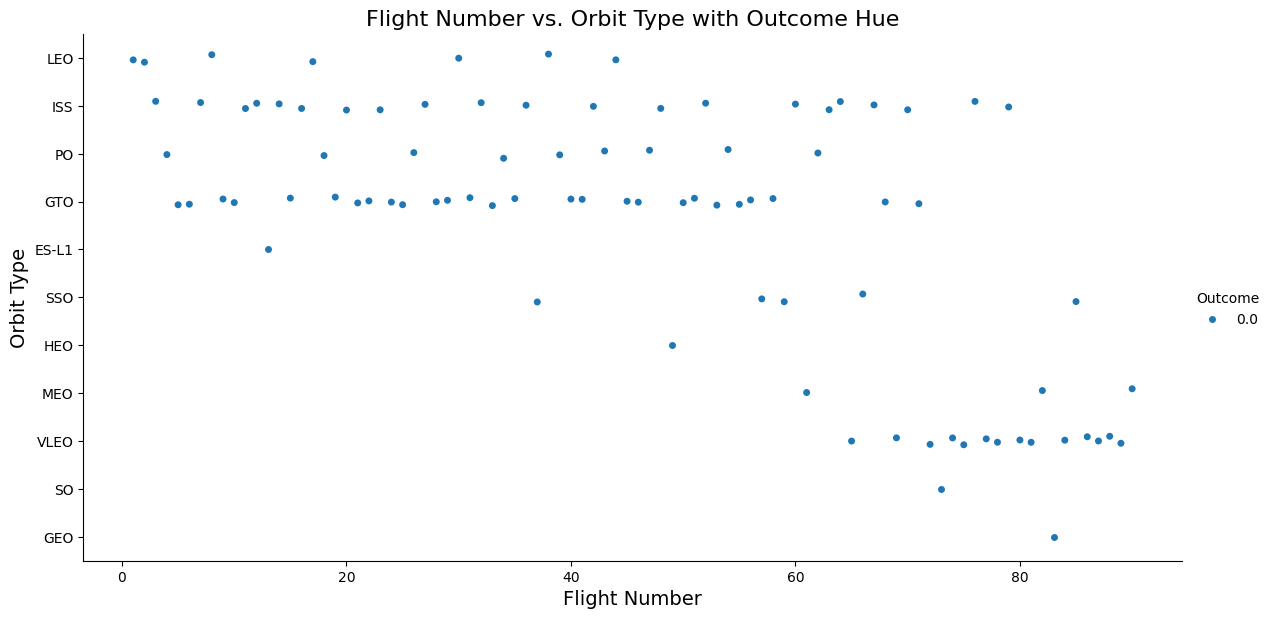

In [22]:
plt.figure(figsize=(12, 6))  # Set figure size for better visibility

# Create the scatter plot using the correct hue column name
sns.catplot(data=df, x='FlightNumber', y='Orbit', hue='Outcome', kind='strip', height=6, aspect=2)

# Set the title and labels
plt.title('Flight Number vs. Orbit Type with Outcome Hue', fontsize=16)
plt.xlabel('Flight Number', fontsize=14)
plt.ylabel('Orbit Type', fontsize=14)

# Show the plot
plt.show()



You can observe that in the LEO orbit, success seems to be related to the number of flights. Conversely, in the GTO orbit, there appears to be no relationship between flight number and success.


### TASK  5: Visualize the relationship between Payload Mass and Orbit type


Similarly, we can plot the Payload Mass vs. Orbit scatter point charts to reveal the relationship between Payload Mass and Orbit type


<Figure size 1200x600 with 0 Axes>

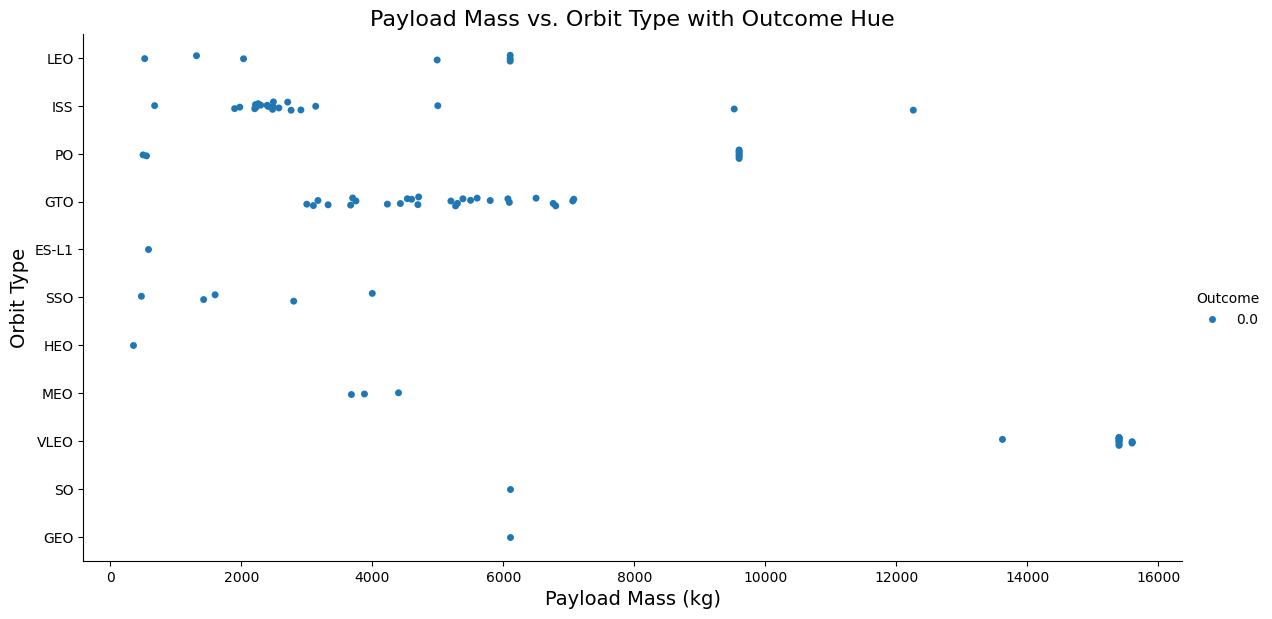

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size for better visibility
plt.figure(figsize=(12, 6))

# Create the scatter plot with the correct column name
sns.catplot(data=df, x='PayloadMass', y='Orbit', hue='Outcome', kind='strip', height=6, aspect=2)

# Set the title and labels
plt.title('Payload Mass vs. Orbit Type with Outcome Hue', fontsize=16)
plt.xlabel('Payload Mass (kg)', fontsize=14)
plt.ylabel('Orbit Type', fontsize=14)

# Show the plot
plt.show()





With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However, for GTO, it's difficult to distinguish between successful and unsuccessful landings as both outcomes are present.


### TASK  6: Visualize the launch success yearly trend


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


The function will help you get the year from the date:


In [ ]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()
    

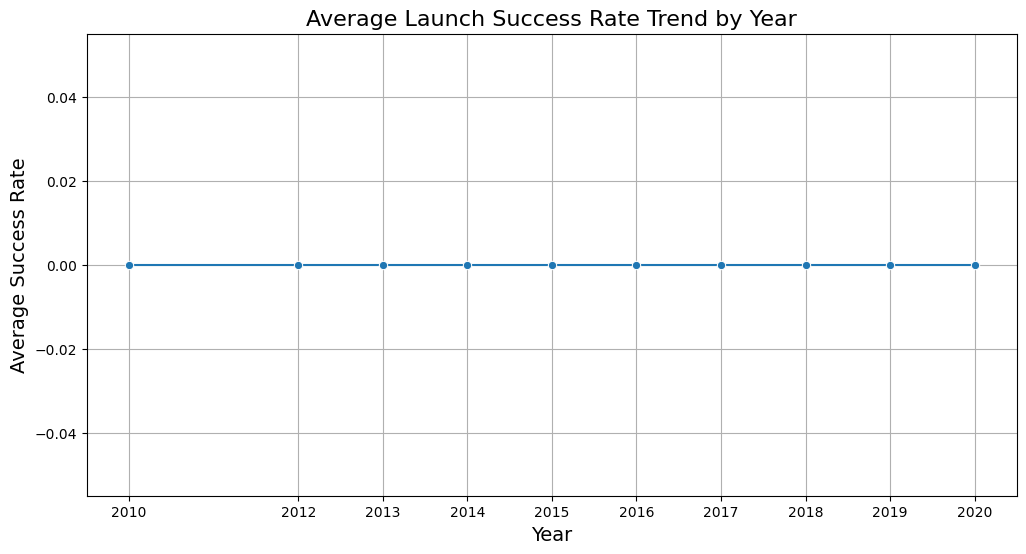

In [28]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
# A function to Extract years from the date
def extract_year():
    year = []
    for date in df["Date"]:
        year.append(date.split("-")[0])  # Extract year from date
    return year

# Apply the function to create a new 'Year' column in the DataFrame
df['Year'] = extract_year()

# Convert the 'Outcome' column to numeric if not already (assuming 1 for success, 0 for failure)
# Adjust this based on your actual outcome representation
df['Outcome'] = df['Outcome'].astype(float)

# Calculate the average success rate by year
average_success_rate = df.groupby('Year')['Outcome'].mean().reset_index()

# Rename the columns for clarity
average_success_rate.columns = ['Year', 'Average Success Rate']

# Convert 'Year' to integer for plotting
average_success_rate['Year'] = average_success_rate['Year'].astype(int)

# Plotting the line chart
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  # Set figure size
sns.lineplot(data=average_success_rate, x='Year', y='Average Success Rate', marker='o')  # Line plot

# Set title and labels
plt.title('Average Launch Success Rate Trend by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Success Rate', fontsize=14)

# Show all years on the x-axis
plt.xticks(average_success_rate['Year'])  
plt.grid()  # Optional: Add grid for better visibility
plt.show()


you can observe that the sucess rate since 2013 kept increasing till 2020


## Features Engineering


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [ ]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

### TASK  7: Create dummy variables to categorical columns


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [30]:
import pandas as pd

# Assuming 'df' is your original DataFrame
# Create a copy of the DataFrame to avoid modifying the original data
features = df.copy()

# Check for existing columns and print them
print("Current columns in DataFrame:")
print(features.columns)

# Specify the categorical columns you want to encode
categorical_columns = ['Orbits', 'LaunchSite', 'LandingPad', 'Serial']

# Check if the specified columns exist in the DataFrame
existing_columns = [col for col in categorical_columns if col in features.columns]

if existing_columns:
    # Create dummy variables for the specified categorical columns
    features_one_hot = pd.get_dummies(features, columns=existing_columns, drop_first=True)
    
    # Display the first few rows of the resulting DataFrame
    print(features_one_hot.head())
else:
    print("None of the specified columns exist in the DataFrame.")


Current columns in DataFrame:
Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'Class', 'Year'],
      dtype='object')
   FlightNumber        Date BoosterVersion  PayloadMass Orbit  Outcome  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO      0.0   
1             2  2012-05-22       Falcon 9   525.000000   LEO      0.0   
2             3  2013-03-01       Falcon 9   677.000000   ISS      0.0   
3             4  2013-09-29       Falcon 9   500.000000    PO      0.0   
4             5  2013-12-03       Falcon 9  3170.000000   GTO      0.0   

   Flights  GridFins  Reused   Legs  ...  Serial_B1048  Serial_B1049  \
0        1     False   False  False  ...         False         False   
1        1     False   False  False  ...         False         False   
2        1     False   False  False 

### TASK  8: Cast all numeric columns to `float64`


Now that our <code>features_one_hot</code> dataframe only contains numbers, cast the entire dataframe to variable type <code>float64</code>


In [32]:
# Check the current data types of the DataFrame
print(features_one_hot.dtypes)

# Identify numeric columns
numeric_columns = features_one_hot.select_dtypes(include=['number']).columns

# Cast only the numeric columns to float64
features_one_hot[numeric_columns] = features_one_hot[numeric_columns].astype('float64')

# Optionally, verify the data types of the columns after conversion
print(features_one_hot.dtypes)



FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
                   ...   
Serial_B1056         bool
Serial_B1058         bool
Serial_B1059         bool
Serial_B1060         bool
Serial_B1062         bool
Length: 74, dtype: object
FlightNumber      float64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
                   ...   
Serial_B1056         bool
Serial_B1058         bool
Serial_B1059         bool
Serial_B1060         bool
Serial_B1062         bool
Length: 74, dtype: object


We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.


In [33]:
import pandas as pd

# Assuming 'df' is your original DataFrame with the listed columns
# Create a copy of the DataFrame to avoid modifying the original data
features = df.copy()

# Apply one-hot encoding to the specified columns
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'], drop_first=True)

# Get the total number of columns in the features_one_hot DataFrame
total_columns = features_one_hot.shape[1]

print(f"Total number of columns after one-hot encoding: {total_columns}")


Total number of columns after one-hot encoding: 83


<code>features_one_hot.to_csv('dataset_part\_3.csv', index=False)</code>


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log-->


<!--
| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|
| 2024-07-18        | 1.2     | Anita Verma | Clarified instructions|
-->


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
